In [491]:
#functions to manipulate graphlets and identify them

import graph_tool as gt
import numpy as np
import graph_tool.generation as gtg
import random
import graph_tool.draw as gtd
import graph_tool.spectral as gts

import networkx as nx #only for graph generator

def random_adj(nb_nodes): 
    """returns an adjancency matrices of nb_nodes each"""
    A = np.random.randint(0,2, size = nb_nodes**2).reshape(nb_nodes,nb_nodes)
    np.fill_diagonal(A, 0)
    for i in range(nb_nodes):
        for j in range(nb_nodes):
            A[i,j] = A[j,i]
    return A

def generate_allconnected_nomultiedge(size):
    """generate all-connected non-multiedge graph of size-number of nodes"""
    connected = False
    while connected == False:
        A = random_adj(size)
        g = nx.convert_matrix.from_numpy_matrix(A)
        connected = nx.is_connected(g)
            
    e = list(nx.generate_edgelist(g, data = False)) #generates edgelist with vertex from 0 to (size-1)
    edge = []
    for i in range(len(e)):
        edge.append([int(e[i][0]), int(e[i][2])])
    g_return = gt.Graph(directed = False)
    g_return.add_edge_list(edge)
    return g_return

def P(G : gt.Graph()):
    """for given graphG, gives profile vector P of 5 integers"""
    V = len(tuple(G.vertices()))
    E = len(tuple(G.edges()))
    deg_dist = np.array([v.in_degree() + v.out_degree() for v in G.vertices()]) #if return it, P depends variant of numerotation
    min_deg = deg_dist.min()
    max_deg = deg_dist.max()
    total_deg = deg_dist.sum()
    #we will should not forget that for same graph G deg_dist depends on G nodes' numerotation
    #on the other hand, first five indicators are independant of G nodes' numerotation
    gtd.graph_draw(G, output_size = (50,50))
    return(np.array([V,E,min_deg,max_deg, total_deg]))

def T(array : np.array):
    """for given profile vector P of integers, return print identified graphlet"""
    V = array[0]
    E = array[1]
    min_deg = array[2]
    max_deg = array[3]
    total_deg = array[4]
    autre = 1
    if V == 2 and E == 1:
        bingo = 'G0'
        autre = 0
    if V == 3 and E == 2:
        bingo = 'G1'
        autre = 0
    if V == 3 and E == 3:
        bingo = 'G2'
        autre = 0
    if V == 4 and E == 3 and max_deg == 3: #not sure if these are the only three necessary conditions to identify G4
        bingo = 'G4'
        autre = 0
    if V == 4 and E == 4 and min_deg == 1 and max_deg == 3:
        bingo = 'G6'
        autre = 0
    if V == 4 and E == 5 and min_deg == 2 and max_deg == 3:
        bingo = 'G7'
        autre = 0
    if V == 4 and E == 6:
        bingo = 'G9'
        autre = 0
    if V == 5 and E == 6 and min_deg == 2 and max_deg == 3:
        bingo = 'G21'
        autre = 0
    if autre == 1:
        bingo = "unidentified graphlet"
    print(bingo)
    return(bingo)


In [507]:
#given integers k number of nodes, and n number of graphs, returns array of n adjacency matrices of k node graphlets
random_adj(3)

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [508]:
#given integer k, returns an all connected non multiedge graph_tool graph of k nodes
G = generate_allconnected_nomultiedge(3)

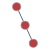

array([3, 2, 1, 2, 4])

In [513]:
#given graph_tool graph, returns 5 integers that are the graphlet's profile characteristics

profile = P(G)
profile

In [514]:
#T returns graphlet name, given graphlet's profile characteristics
T(np.array(profile))

G1


'G1'

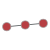

G1


'G1'

In [515]:
#given graph_tool graph, returns graphlet name  
T(P(G))

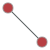

G0


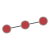

G1


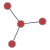

G4


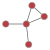

unidentified graphlet


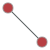

G0


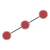

G1


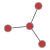

G4


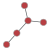

unidentified graphlet


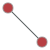

G0


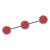

G1


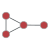

G6


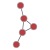

unidentified graphlet


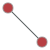

G0


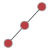

G1


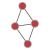

G7


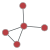

unidentified graphlet


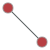

G0


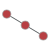

G1


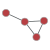

G6


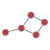

unidentified graphlet


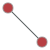

G0


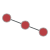

G1


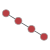

unidentified graphlet


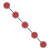

unidentified graphlet


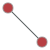

G0


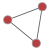

G2


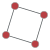

unidentified graphlet


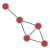

unidentified graphlet


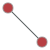

G0


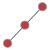

G1


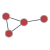

G6


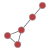

unidentified graphlet


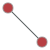

G0


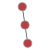

G1


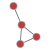

G6


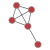

unidentified graphlet


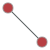

G0


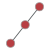

G1


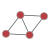

G7


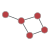

unidentified graphlet
there are  12 unidentified graphlets
which is 70 percents of identified, including those wrongly identified
duration is =  6 s


In [517]:
#generate many graphlets and identify them

import time

s = time.time()
sample = 10 # number of graphlets
k = 5       #2 < k number of nodes in graphlets

unidentified = 0
for g in range(sample):
    for nodes in range(2,k+1):
        if T(P(generate_allconnected_nomultiedge(nodes))) == 'unidentified graphlet':
            unidentified = unidentified + 1
            
print("there are ",unidentified,"unidentified graphlets")
print("which is",int((1-(unidentified/(sample*(k-1))))*100),"percents of identified, including those wrongly identified")
print("duration is = ",int(time.time()-s),"s")

In [488]:
#TRASH, functions that don't generate all connected non multiedge graphs

def generate_graphlet(nb_nodes): #PROBLEM generate multi-edge graphs whereas I want no multi-edge..
    """generate graphlet object G from nb_nodes"""
    """undirected, no parrallel_edges edges, max degree is 3"""
    def deg(): #degree distribution is imposed here, in contradiction with parrallel_edges property imposed as well
        if nb_nodes == 2:
            array = np.array([int(random.random()*1.5) for i in range(nb_nodes)])
        if nb_nodes == 3:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        if nb_nodes == 4:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        if nb_nodes == 5:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        return array
                #np.array([int(random.random()*(nb_nodes/2)+1) for i in range(nb_nodes)])
                #np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
    G = gtg.random_graph(nb_nodes, deg, parallel_edges = False)
    G.set_directed(False)
    #gtd.graph_draw(G, output_size = (50,50))
    #A = gts.adjacency(G).todense()
    return G

def generate_n_graphlets(nb_nodes,many):
    """generate np_nodes-nodes graph_tool graphlets many-time objects, return the list array of objects"""
    many_graphlets = np.array([generate_graphlet(nb_nodes) for i in range(many)], dtype = object)
    return(many_graphlets)


def random_n_adj(nb_nodes, n): 
    """returns n adjancency matrices of nb_nodes each"""
    n_A = [random_adj(nb_nodes) for i in range(n)]
    return n_A

def generate_2345_graphlets(n):
    """generate 4*n 2,3,4,5-node graphlets, return then in array of objects"""
    array_2345_graphs = np.concatenate([generate_n_graphlets(n,i) for i in range(2,6)])
    return array_2345_graphs

def percentage_identified(n):
    """generate n sample of each k-node graphlet for k=2,3,4,5, identify them, show percentage of identified"""
    #n samples of each k-graphlet
    win = []
    for i in range(len(generate_2345_graphlets(n))):
        if T(P(generate_2345_graphlets(n)[i])) != "unidentified graph":
            win.append(1)
    print(int(np.array(win).sum()/len(generate_2345_graphlets(n))*100), "%")
    return(int(np.array(win).sum()/len(generate_2345_graphlets(n))*100))

def generator_no_multiedge(size):
    """generate graph_tool graph of size-number of nodes with multi-edges"""  
    A = random_n_adj(size,1)[0]
    g = nx.convert_matrix.from_numpy_matrix(A)
    e = list(nx.generate_edgelist(g, data = False)) #generates edgelist with vertex from 0 to (size-1)
    edge = []
    for i in range(len(e)):
            edge.append([int(e[i][0]), int(e[i][2])])
    G = gt.Graph(directed = False)
    G.add_edge_list(edge)
    return G
